# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f'There are {len(cities)} cities in this list.')

There are 646 cities in this list.


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
openweathermap_url = 'https://api.openweathermap.org/'

def get_current_weather_data(q, appid, mode=None, units=None, lang=None):

    payload = {
        'q' : q,
        'appid' : appid
    }
    if mode: params['mode'] = mode
    if units: params['units'] = units
    if lang: params['lang'] = lang
    time.sleep(1)
    return requests.get(openweathermap_url + 'data/2.5/weather', params=payload)

In [4]:
def filter_city_data(cities):
    return {
        'City_ID' : cities['id'],
        'City' : cities['name'],
        'Cloudiness' : cities['clouds']['all'],
        'Country' : cities['sys']['country'],
        'Date' : cities['dt'],
        'Humidity' : cities['main']['humidity'],
        'Lat' : cities['coord']['lat'],
        'Lng' : cities['coord']['lon'],
        
        # Pull out temps and convert from kelvin to fahrenheit
        'Min Temp' : float(cities['main']['temp_min']) * (9/5) - 459.67,
        'Max Temp' : float(cities['main']['temp_max']) * (9/5) - 459.67,
        'Wind Speed' : cities['main']['humidity']
    }

def convert_cities_to_dataframe(cities):

    df = pd.DataFrame()
    
    # If there are no cities, exit
    if len(cities) < 1: return df
    for city in cities:
        
        # Print status
        status = f'{(cities.index(city) + 1)} of {len(cities)}'
        print(f'({status}) City {city} successfully found.')
        
        try:
            request = get_current_weather_data(city, weather_api_key)
            
            # If request fails, exit
            if request.status_code != 200:
                print(f'\tCould not find city {city}, error {request.status_code}')
                continue
                
            # Convert the json into the raw city data
            raw_city_data = filter_city_data(request.json())
            city_df = pd.DataFrame(raw_city_data, index=[0])
            
            # Add the dataset
            df = pd.concat([df, city_df])
            
        except Exception as e:
            print(f'Error - could not ping city {city}, ERROR: {e}')
            
    # Convert the time data
    df['Date'] = pd.to_datetime(df['Date'], unit='s')
    return df.reset_index(drop=True)

df = convert_cities_to_dataframe(cities)

(1 of 646) City felanitx successfully found.
(2 of 646) City cape town successfully found.
(3 of 646) City comodoro rivadavia successfully found.
(4 of 646) City marcona successfully found.
	Could not find city marcona, error 404
(5 of 646) City kodiak successfully found.
(6 of 646) City georgetown successfully found.
(7 of 646) City qazvin successfully found.
(8 of 646) City gorele successfully found.
(9 of 646) City sao filipe successfully found.
(10 of 646) City bethel successfully found.
(11 of 646) City punta arenas successfully found.
(12 of 646) City bara successfully found.
(13 of 646) City hermanus successfully found.
(14 of 646) City meulaboh successfully found.
(15 of 646) City erenhot successfully found.
(16 of 646) City barcelos successfully found.
(17 of 646) City albany successfully found.
(18 of 646) City hobart successfully found.
(19 of 646) City ushuaia successfully found.
(20 of 646) City clyde river successfully found.
(21 of 646) City upernavik successfully found.

(163 of 646) City iqaluit successfully found.
(164 of 646) City guozhen successfully found.
(165 of 646) City saint-francois successfully found.
(166 of 646) City ahuimanu successfully found.
(167 of 646) City kudahuvadhoo successfully found.
(168 of 646) City collie successfully found.
(169 of 646) City crotone successfully found.
(170 of 646) City moose factory successfully found.
(171 of 646) City olafsvik successfully found.
(172 of 646) City olavarria successfully found.
(173 of 646) City salinas successfully found.
(174 of 646) City arman successfully found.
(175 of 646) City blackwater successfully found.
(176 of 646) City phnum penh successfully found.
	Could not find city phnum penh, error 404
(177 of 646) City khatanga successfully found.
(178 of 646) City bambari successfully found.
(179 of 646) City sloboda successfully found.
(180 of 646) City kununurra successfully found.
(181 of 646) City san patricio successfully found.
(182 of 646) City kurilsk successfully found.
(183

(326 of 646) City lata successfully found.
(327 of 646) City vestmannaeyjar successfully found.
(328 of 646) City kharovsk successfully found.
(329 of 646) City west odessa successfully found.
(330 of 646) City sagana successfully found.
(331 of 646) City carman successfully found.
(332 of 646) City kota kinabalu successfully found.
(333 of 646) City el real de santa maria successfully found.
(334 of 646) City singapore successfully found.
(335 of 646) City plaridel successfully found.
(336 of 646) City pacific grove successfully found.
(337 of 646) City lahad datu successfully found.
(338 of 646) City lerwick successfully found.
(339 of 646) City limon successfully found.
(340 of 646) City drovyanaya successfully found.
(341 of 646) City makakilo city successfully found.
(342 of 646) City poum successfully found.
(343 of 646) City praia da vitoria successfully found.
(344 of 646) City conakry successfully found.
(345 of 646) City pangnirtung successfully found.
(346 of 646) City te an

(493 of 646) City herat successfully found.
(494 of 646) City kailua successfully found.
(495 of 646) City buraydah successfully found.
(496 of 646) City paka successfully found.
(497 of 646) City tateyama successfully found.
(498 of 646) City hanzhong successfully found.
(499 of 646) City muravlenko successfully found.
(500 of 646) City san rafael successfully found.
(501 of 646) City adamovka successfully found.
(502 of 646) City mortka successfully found.
(503 of 646) City kasempa successfully found.
(504 of 646) City ekhabi successfully found.
(505 of 646) City chapais successfully found.
(506 of 646) City ngorongoro successfully found.
(507 of 646) City ust-tsilma successfully found.
(508 of 646) City lisala successfully found.
(509 of 646) City sao joao da barra successfully found.
(510 of 646) City big spring successfully found.
(511 of 646) City cazaje successfully found.
	Could not find city cazaje, error 404
(512 of 646) City saleaula successfully found.
	Could not find city 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Save DataFrame to a .csv file
df.to_csv("../output_data/cities.csv", index=True, index_label="City ID", header=True)

# Display the DataFrame
df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Min Temp,Max Temp,Wind Speed
0,2517750,Felanitx,1,ES,2022-11-24 03:16:23,81,39.4696,3.1483,52.322,61.952,81
1,3369157,Cape Town,90,ZA,2022-11-24 03:11:53,90,-33.9258,18.4232,57.902,59.882,90
2,3860443,Comodoro Rivadavia,0,AR,2022-11-24 03:16:27,23,-45.8667,-67.5000,57.056,57.056,23
3,5866583,Saint Paul Harbor,20,US,2022-11-24 03:16:30,75,57.7900,-152.4072,36.914,36.914,75
4,1735106,George Town,40,MY,2022-11-24 03:08:19,84,5.4112,100.3354,82.238,84.884,84
...,...,...,...,...,...,...,...,...,...,...,...
593,2155562,Nelson Bay,1,AU,2022-11-24 03:36:58,64,-32.7167,152.1500,71.006,76.082,64
594,4026082,Lázaro Cárdenas,75,MX,2022-11-24 03:37:01,85,17.9583,-102.2000,76.874,76.874,85
595,4844309,Torrington,11,US,2022-11-24 03:37:05,81,41.8007,-73.1212,26.690,38.192,81
596,3663517,Manaus,100,BR,2022-11-24 03:33:31,94,-3.1019,-60.0250,73.904,75.686,94


In [8]:
df.describe()

,City_ID,Cloudiness,Humidity,Lat,Lng,Min Temp,Max Temp,Wind Speed
count,5.980000e+02,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000
mean,2.659095e+06,58.556856,74.570234,21.671164,19.391892,50.504632,51.647030,74.570234
std,1.684978e+06,38.995244,20.284350,33.207465,89.527755,29.245617,29.186753,20.284350
min,5.567100e+04,0.000000,10.000000,-54.800000,-179.166700,-40.846000,-40.846000,10.000000
25%,1.504784e+06,20.000000,64.000000,-3.681900,-58.022950,32.850500,36.770000,64.000000
50%,2.183477e+06,71.500000,78.000000,26.225350,25.150750,59.855000,60.881000,78.000000
75%,3.576209e+06,99.000000,91.000000,50.107550,94.854150,73.521500,74.462000,91.000000
max,1.072286e+07,100.000000,100.000000,78.218600,179.316700,93.218000,93.434000,100.000000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Inspect the data and remove the cities where the humidity > 100%.

Skip this step if there are no cities that have humidity > 100%.

In [10]:
# Find cities with humidity > 100%
humidity_100 = df.loc[df["Humidity"] > 100, :]

if humidity_100.empty == True:
    print("There are no cities with humidity values over 100%")
    print("Using original dataframe to continue with plotting...")
    
    # Extract the relevant fields from the DataFrame for plotting
    latitudes = df["Lat"]
    temperatures = df["Max Temp"]
    humidity = df["Humidity"]
    cloudiness = df["Cloudiness"]
    windspeed = df["Wind Speed"]
    
else:
    # Get the indices of cities that have humidity over 100%
    HumidityIndex = humidity_100.index
    
    # Create a clean DataFrame by dropping all humidity outliers by index found above
    clean_city_data = df.drop(HumidityIndex).reset_index(drop=True)
    clean_city_data.head()
    
    # --- extract relevant fields from the data frame for plotting ---
    latitudes = clean_city_data["Lat"]
    temperatures = clean_city_data["Max Temp (F)"]
    humidity = clean_city_data["Humidity (%)"]
    cloudiness = clean_city_data["Cloudiness (%)"]
    windspeed = clean_city_data["Wind Speed (mph)"]

    # --- export the new dataframe into a csv ---
    clean_city_data.to_csv("../output_data/clean_city_data.csv", index=True, index_label="City ID", header=True)

There are no cities with humidity values over 100%
Using original dataframe to continue with plotting...


## Latitude vs. Temperature Plot

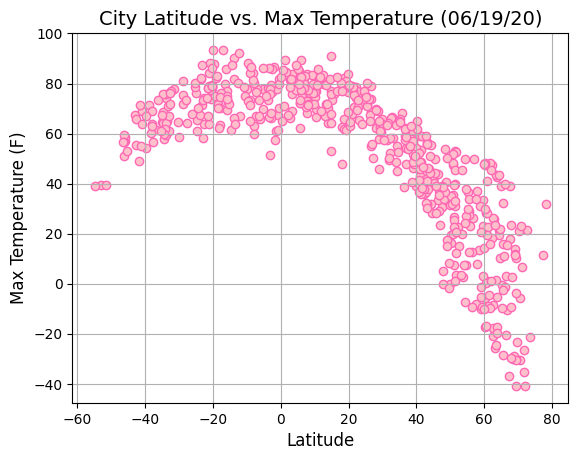

In [12]:
# Create a scatter plot depicting latitude vs temperature
plt.scatter(latitudes, temperatures, marker="o", facecolors="pink", edgecolors="hotpink")

# Add labels, titles, limits and grids
plt.title("City Latitude vs. Max Temperature (06/19/20)", fontsize=14)
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# Display and save the plot
plt.savefig("../images/latitude-vs-temp.png")
plt.show()

#### The plot above shows a strong correlation between temperature and latitude. The temperature is much warmer the closer one gets to the 0 degrees.

## Latitude vs. Humidity Plot

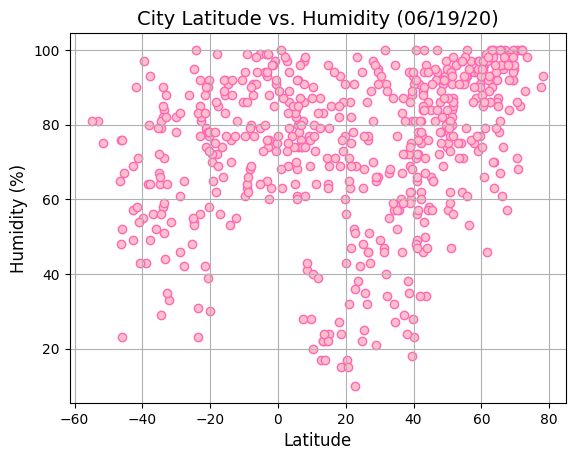

In [13]:
# Create a scatter plot depicting latitude vs humidity
plt.scatter(latitudes, humidity, marker="o", facecolors="pink", edgecolors="hotpink")

# Add labels, titles, limits and grids
plt.title("City Latitude vs. Humidity (06/19/20)", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# Display and save the plot
plt.savefig("../images/latitude-vs-humidity.png")
plt.show()

##### This scatter plot shows there is a strong correlation between humidity and latitude. The data points show most of the cities with high humidity appear to be closer to the equator or in the northern hemisphere.

## Latitude vs. Cloudiness Plot

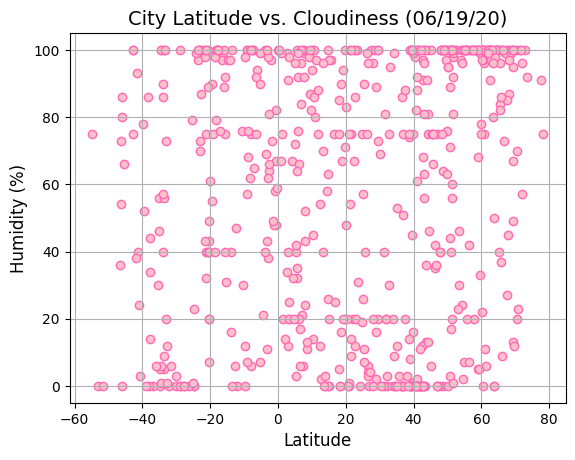

In [14]:
# Create a scatter plot depicting latitude vs cloudiness
plt.scatter(latitudes, cloudiness, marker="o", facecolors="pink", edgecolors="hotpink")

# Add labels, titles, limits and grids
plt.title("City Latitude vs. Cloudiness (06/19/20)", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# Display and save the plot
plt.savefig("../images/latitude-vs-cloudiness.png")
plt.show()

##### This scatterplot shows cloudiness vs. latitude. It does not appear to show much correlation between the two.

## Latitude vs. Wind Speed Plot

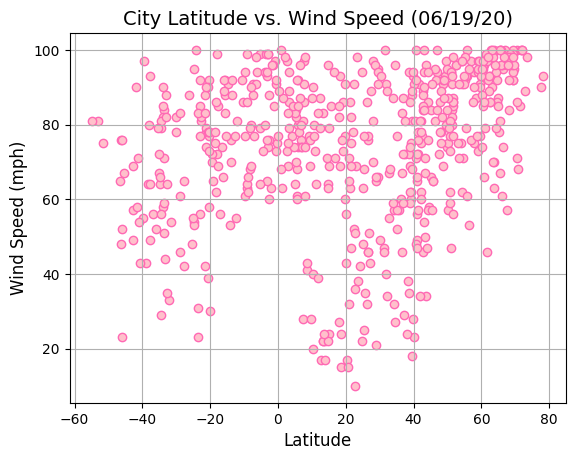

In [17]:
# Create a scatter plot depicting latitude vs wind speed
plt.scatter(latitudes, windspeed, marker="o", facecolors="pink", edgecolors="hotpink")

# Add labels, titles, limits and grids
plt.title("City Latitude vs. Wind Speed (06/19/20)", fontsize=14)
plt.ylabel("Wind Speed (mph)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# Display and save the plot
plt.savefig("../images/latitude-vs-windspeed.png")
plt.show()

##### The scatterplot above shows wind speed vs. latitude. There seems to be a slight correlation between the two. The wind speed increases as the latitude gets higher.

## Linear Regression

In [52]:
# Create a function to create Linear Regression plots

def plot_linear_regression(x, y, ax =None):
    
    # Use axes specified
    ax = ax
    
    # Get linear regression values and store in variables
    slope, intercept, rvalue, pvalue, stderror = linregress(x, y)
    print(f"Linear Regression Completed...")
    print(f"The R Squared is: {rvalue**2}")
    
    # y = m * x + b
    regress_values = slope * x + intercept
    
    # Create line equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Plot the linear model
    ax.plot(x, regress_values, color="hotpink")
    
    # Return the plot and line equation created
    return ax, line_eq# Create Northern and Southern Hemisphere DataFrames

# Find and store rows for Northern Hemisphere DataFrame (greater than or equal to 0 degrees latitude)
if humidity_100.empty == True:
    northern_hemisphere = df.loc[df["Lat"] >= 0, :].copy().reset_index(drop=True)
else:
    northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0, :].copy().reset_index(drop=True)
    

# Find and store rows for Southern Hemisphere DataFrame (less than 0 degrees latitude)
if humidity_100.empty == True:
    southern_hemisphere = df.loc[df["Lat"] < 0, :].copy().reset_index(drop=True)
else:
    southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0, :].copy().reset_index(drop=True)    

# Extract relevant fields from both DataFrames for plotting
north_latitudes = northern_hemisphere["Lat"]
north_temperatures = northern_hemisphere["Max Temp"]
north_humidity = northern_hemisphere["Humidity"]
north_cloudiness = northern_hemisphere["Cloudiness"]
north_windspeed = northern_hemisphere["Wind Speed"]

south_latitudes = southern_hemisphere["Lat"]
south_temperatures = southern_hemisphere["Max Temp"]
south_humidity = southern_hemisphere["Humidity"]
south_cloudiness = southern_hemisphere["Cloudiness"]
south_windspeed = southern_hemisphere["Wind Speed"]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.746898980854691


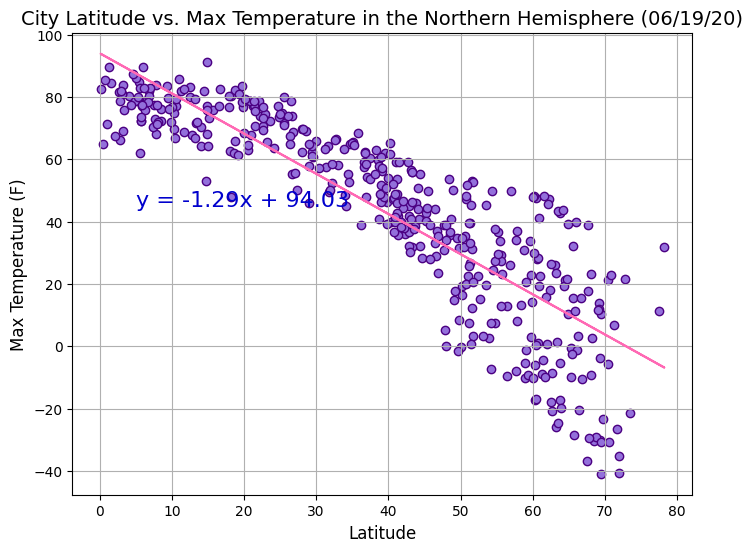

In [51]:
# Create scatter plot
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(north_latitudes, north_temperatures, marker="o", facecolors="mediumpurple", edgecolors="indigo")

# Call linear regression plot function to retrieve plot and line equation
ax, line_eq = plot_linear_regression(north_latitudes, north_temperatures, ax)

# Add labels, title, limits and grid
plt.title("City Latitude vs. Max Temperature in the Northern Hemisphere (06/19/20)", fontsize=14)
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# Annotate the linear regression line equation on the plot
plt.annotate(line_eq, (5,45), fontsize=16, color="mediumblue")

# Display and save the plot
plt.savefig("../images/northern-latitude-vs-temp-linreg.png")
plt.show()

### Northern/Southern Hemispheres - Temperature 

##### Both scatter plots show a strong correlation between temperature and latitude. The northern hemisphere shows a negative correlation while the southern hemisphere shows positive. It is apparent that temperatures are higher as you get closer to the equator. In the northern hemisphere,temperatures fall as latitude increases, and in the southern, they increase with the latitude.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.2832451684817298


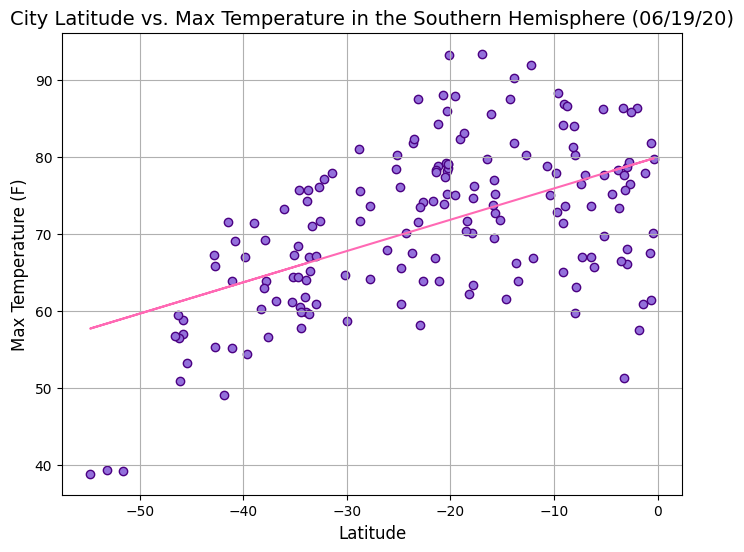

In [47]:
# Create scatter plot
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(south_latitudes, south_temperatures, marker="o", facecolors="mediumpurple", edgecolors="indigo")

# Call linear regression plot function to retrieve plot and line equation
ax, line_eq = plot_linear_regression(south_latitudes, south_temperatures, ax)

# Add labels, title, limits and grid
plt.title("City Latitude vs. Max Temperature in the Southern Hemisphere (06/19/20)", fontsize=14)
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# Annotate the linear regression line equation on the plot
plt.annotate(line_eq, (5,45), fontsize=16, color="mediumblue")

# Display and save the plot
plt.savefig("../images/northern-latitude-vs-temp-linreg.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.13752889774102126


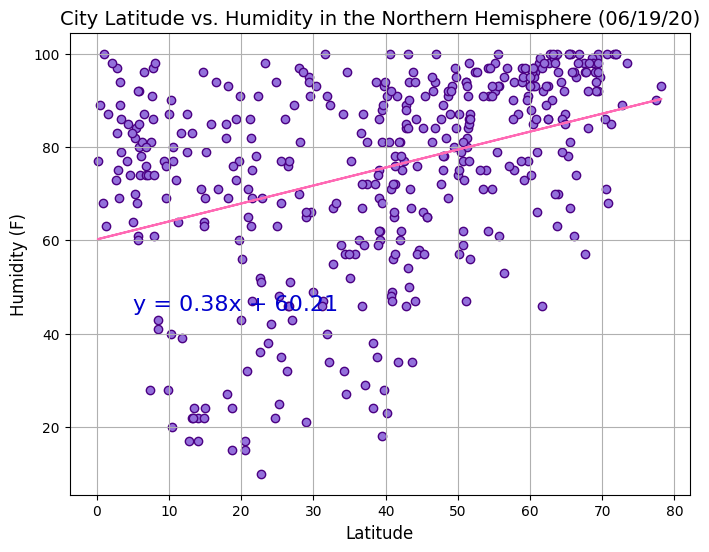

In [48]:
# Create scatter plot
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(north_latitudes, north_humidity, marker="o", facecolors="mediumpurple", edgecolors="indigo")

# Call linear regression plot function to retrieve plot and line equation
ax, line_eq = plot_linear_regression(north_latitudes, north_humidity, ax)

# Add labels, title, limits and grid
plt.title("City Latitude vs. Humidity in the Northern Hemisphere (06/19/20)", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# Annotate the linear regression line equation on the plot
plt.annotate(line_eq, (5,45), fontsize=16, color="mediumblue")

# Display and save the plot
plt.savefig("../images/northern-latitude-vs-humidity-linreg.png")
plt.show()

### Northern/Southern Hemispheres Humidity

##### The plots show there is a slight correlation between humidity and latitude in both northern and southern hemispheres. As the latitude increases, the humidity increases as well.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.15779341963829052


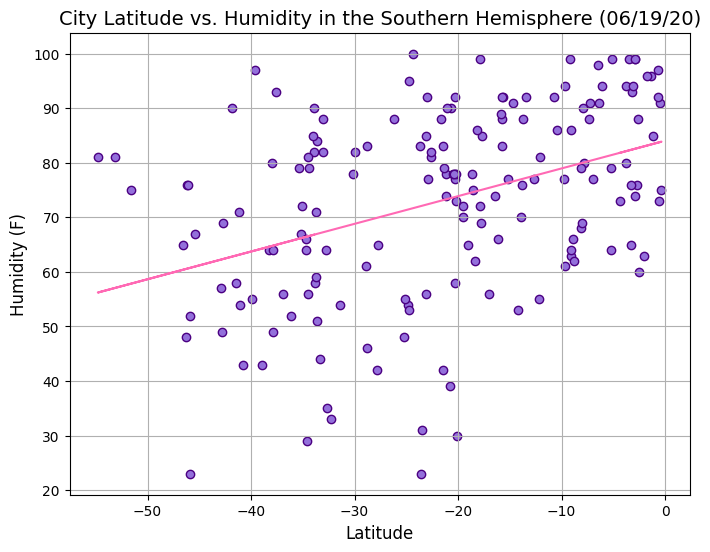

In [53]:
# Create scatter plot
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(south_latitudes, south_humidity, marker="o", facecolors="mediumpurple", edgecolors="indigo")

# Call linear regression plot function to retrieve plot and line equation
ax, line_eq = plot_linear_regression(south_latitudes, south_humidity, ax)

# Add labels, title, limits and grid
plt.title("City Latitude vs. Humidity in the Southern Hemisphere (06/19/20)", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# Annotate the linear regression line equation on the plot
plt.annotate(line_eq, (5,45), fontsize=16, color="mediumblue")

# Display and save the plot
plt.savefig("../images/southern-latitude-vs-humidity-linreg.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.05613695039875685


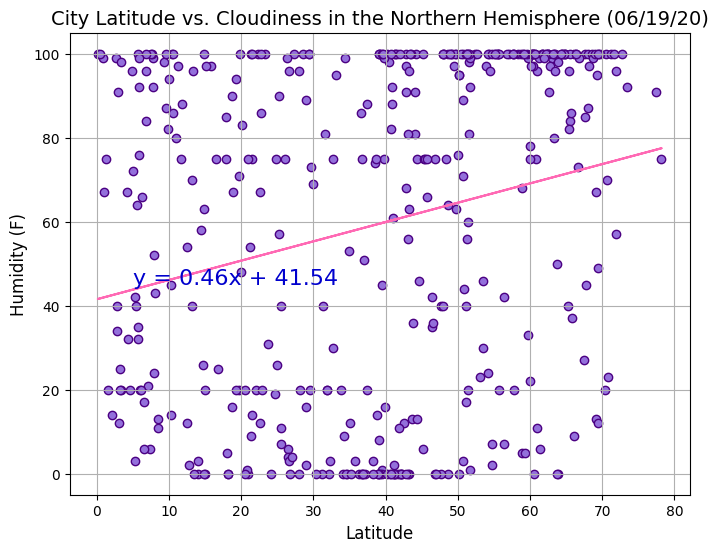

In [54]:
# Create scatter plot
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(north_latitudes, north_cloudiness, marker="o", facecolors="mediumpurple", edgecolors="indigo")

# Call linear regression plot function to retrieve plot and line equation
ax, line_eq = plot_linear_regression(north_latitudes, north_cloudiness, ax)

# Add labels, title, limits and grid
plt.title("City Latitude vs. Cloudiness in the Northern Hemisphere (06/19/20)", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# Annotate the linear regression line equation on the plot
plt.annotate(line_eq, (5,45), fontsize=16, color="mediumblue")

# Display and save the plot
plt.savefig("../images/northern-latitude-vs-cloudiness-linreg.png")
plt.show()

### Northern/Southern Hemispheres Wind Speed

##### The plots show there is not a correlation between the cloudiness and latitude in both the northern and southern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.06160239787548141


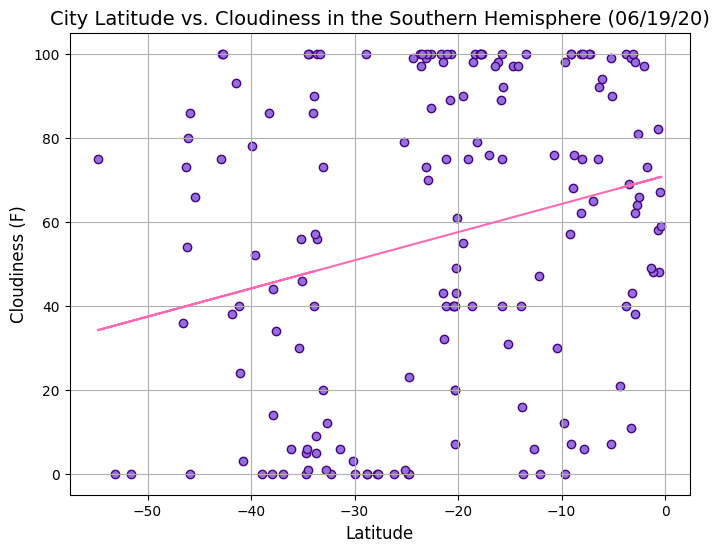

In [55]:
# Create scatter plot
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(south_latitudes, south_cloudiness, marker="o", facecolors="mediumpurple", edgecolors="indigo")

# Call linear regression plot function to retrieve plot and line equation
ax, line_eq = plot_linear_regression(south_latitudes, south_cloudiness, ax)

# Add labels, title, limits and grid
plt.title("City Latitude vs. Cloudiness in the Southern Hemisphere (06/19/20)", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# Annotate the linear regression line equation on the plot
plt.annotate(line_eq, (5,45), fontsize=16, color="mediumblue")

# Display and save the plot
plt.savefig("../images/southern-latitude-vs-cloudiness-linreg.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.13752889774102126


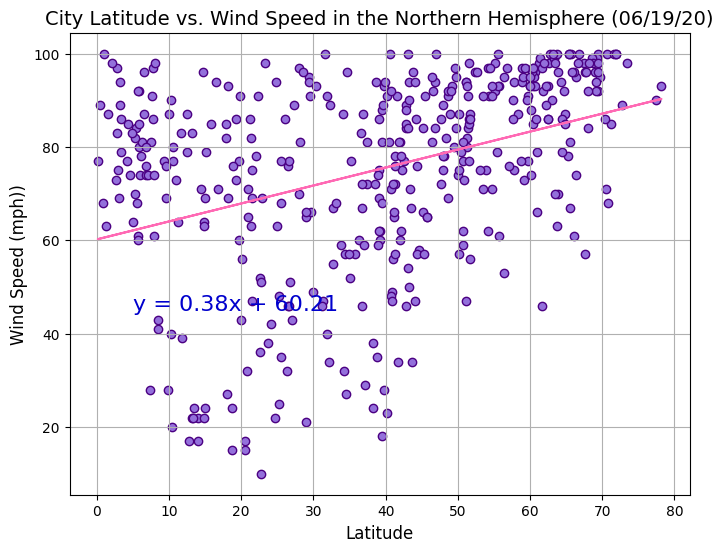

In [56]:
# Create scatter plot
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(north_latitudes, north_windspeed, marker="o", facecolors="mediumpurple", edgecolors="indigo")

# Call linear regression plot function to retrieve plot and line equation
ax, line_eq = plot_linear_regression(north_latitudes, north_windspeed, ax)

# Add labels, title, limits and grid
plt.title("City Latitude vs. Wind Speed in the Northern Hemisphere (06/19/20)", fontsize=14)
plt.ylabel("Wind Speed (mph))", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# Annotate the linear regression line equation on the plot
plt.annotate(line_eq, (5,45), fontsize=16, color="mediumblue")

# Display and save the plot
plt.savefig("../images/northern-latitude-vs-windspeed-linreg.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

### Northern/Southern Hemispheres Wind Speed

##### The plots show there is a slight correlation between wind speed and latitude in both the northern and southern hemispheres.

Linear Regression Completed...
The R Squared is: 0.15779341963829052


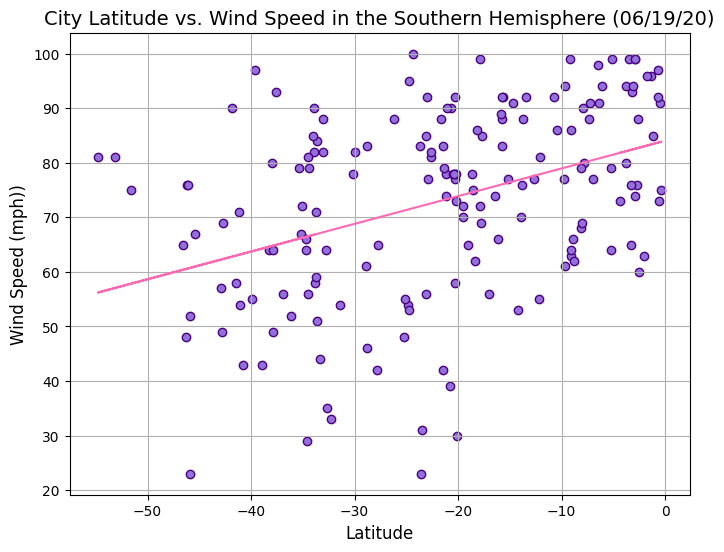

In [60]:
# Create scatter plot
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(south_latitudes, south_windspeed, marker="o", facecolors="mediumpurple", edgecolors="indigo")

# Call linear regression plot function to retrieve plot and line equation
ax, line_eq = plot_linear_regression(south_latitudes, south_windspeed, ax)

# Add labels, title, limits and grid
plt.title("City Latitude vs. Wind Speed in the Southern Hemisphere (06/19/20)", fontsize=14)
plt.ylabel("Wind Speed (mph))", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# Annotate the linear regression line equation on the plot
plt.annotate(line_eq, (5,45), fontsize=16, color="mediumblue")

# Display and save the plot
plt.savefig("../images/southern-latitude-vs-windspeed-linreg.png")
plt.show()